Load the `train.csv` file into a pandas DataFrame.


In [15]:
import pandas as pd

df = pd.read_csv('Happywhale/happy-whale-and-dolphin/train.csv')
display(df.head())

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


Count the number of images per individual and identify the most and least common individuals by grouping the DataFrame by 'individual_id', counting the occurrences, and sorting the results.



In [16]:
individual_counts = df['individual_id'].value_counts()
least_common_individuals = individual_counts.sort_values(ascending=True)
most_common_individuals = individual_counts.sort_values(ascending=False)

print("Least common individuals:")
display(least_common_individuals.head())

print("\nMost common individuals:")
display(most_common_individuals.head())

Least common individuals:


individual_id
fa7116f3dfba    1
a2d90d965ca2    1
4d40a42c8f08    1
5d87dcdb5734    1
d78fe5bd2004    1
Name: count, dtype: int64


Most common individuals:


individual_id
37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
Name: count, dtype: int64

Count the occurrences of each species, sort them to find the least and most common, and display the results.



In [17]:
species_counts = df['species'].value_counts()
least_common_species = species_counts.sort_values(ascending=True)
most_common_species = species_counts.sort_values(ascending=False)

print("Least common species:")
display(least_common_species.head())

print("\nMost common species:")
display(most_common_species.head())

Least common species:


species
frasiers_dolphin          14
rough_toothed_dolphin     60
pygmy_killer_whale        76
commersons_dolphin        90
globis                   116
Name: count, dtype: int64


Most common species:


species
bottlenose_dolphin    9664
beluga                7443
humpback_whale        7392
blue_whale            4830
false_killer_whale    3326
Name: count, dtype: int64

In [19]:
# Calculate individual imbalance ratio
individual_counts = df['individual_id'].value_counts()
individual_imbalance_ratio = individual_counts.max() / individual_counts.min()

# Calculate species imbalance ratio
species_counts = df['species'].value_counts()
species_imbalance_ratio = species_counts.max() / species_counts.min()

# Print the imbalance ratios
print(f"Individual imbalance ratio (Most common / Least common): {individual_imbalance_ratio:.2f}")
print(f"Species imbalance ratio (Most common / Least common): {species_imbalance_ratio:.2f}")

# Explain the ratios
print("\nThese ratios indicate the severity of data imbalance.")
print(f"The individual imbalance ratio of {individual_imbalance_ratio:.2f} means the most common individual appears {individual_imbalance_ratio:.2f} times more often than the least common individual.")
print(f"The species imbalance ratio of {species_imbalance_ratio:.2f} means the most common species appears {species_imbalance_ratio:.2f} times more often than the least common species.")

Individual imbalance ratio (Most common / Least common): 400.00
Species imbalance ratio (Most common / Least common): 690.29

These ratios indicate the severity of data imbalance.
The individual imbalance ratio of 400.00 means the most common individual appears 400.00 times more often than the least common individual.
The species imbalance ratio of 690.29 means the most common species appears 690.29 times more often than the least common species.


Create the plots to visualize the distributions of images across individuals and species



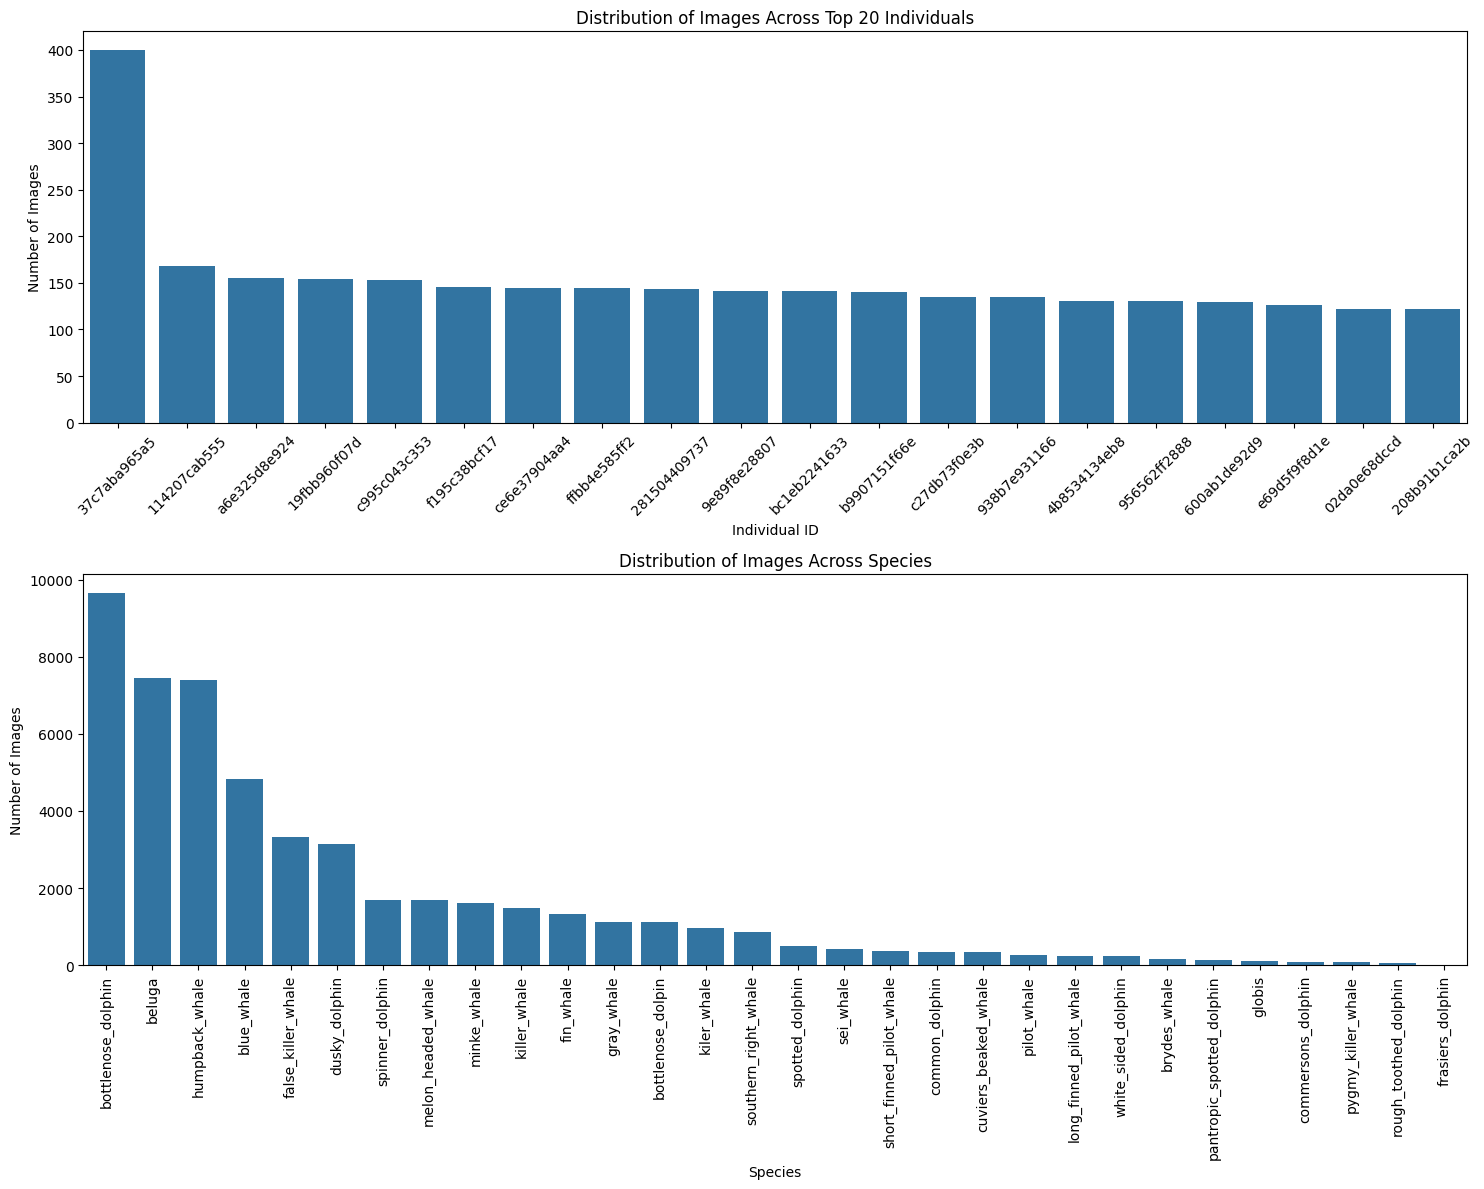

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate individual and species counts
individual_counts = df['individual_id'].value_counts()
species_counts = df['species'].value_counts()

# Create figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot top 20 individuals
sns.barplot(x=individual_counts.head(20).index, y=individual_counts.head(20).values, ax=axes[0])
axes[0].set_xlabel("Individual ID")
axes[0].set_ylabel("Number of Images")
axes[0].set_title("Distribution of Images Across Top 20 Individuals")
axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Plot species distribution
sns.barplot(x=species_counts.index, y=species_counts.values, ax=axes[1])
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Number of Images")
axes[1].set_title("Distribution of Images Across Species")
axes[1].tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()